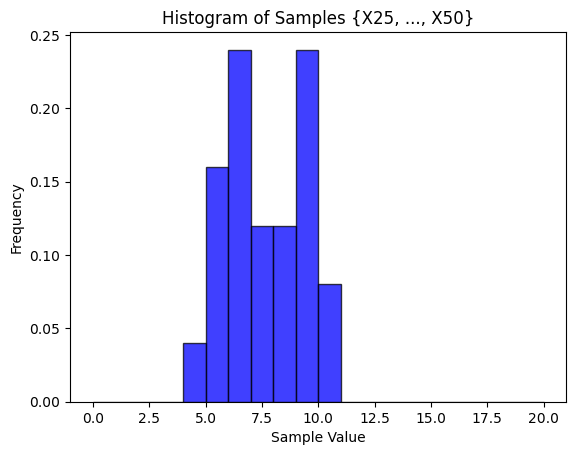

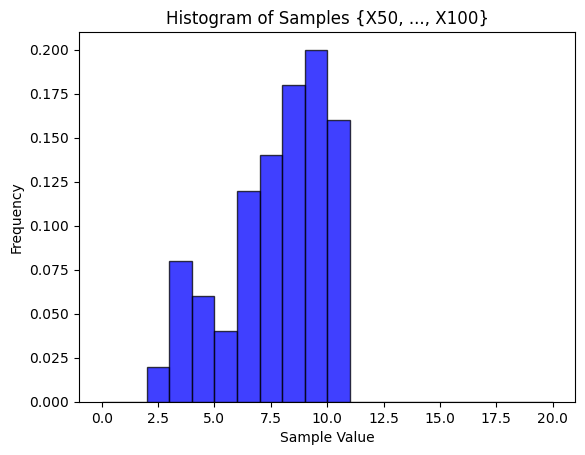

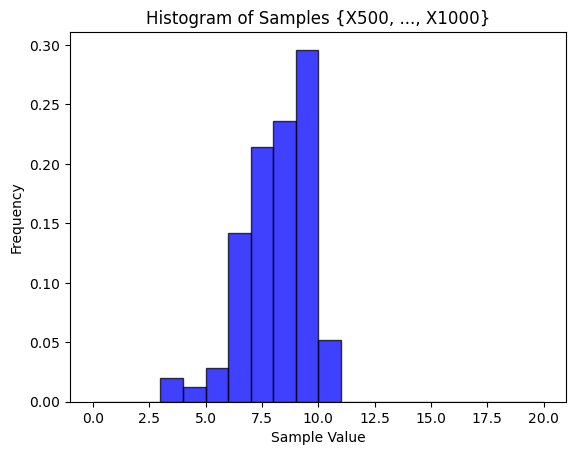

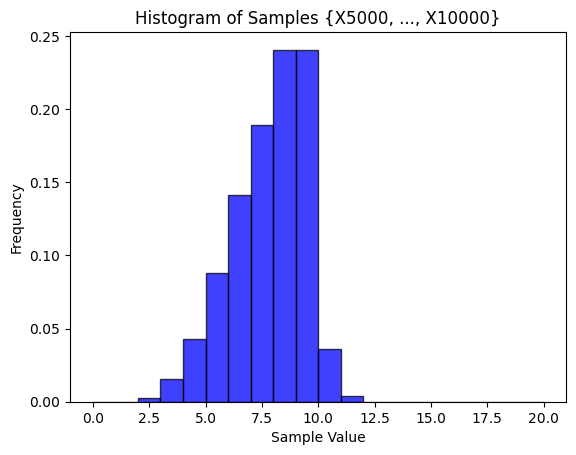

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

def target_distribution(x, lam=10):
    return (lam**x) / factorial(x)

def metropolis_hastings_poisson(n_samples=10000, lam=10):
    samples = []
    x = 0  
    
    for i in range(n_samples):
        if x == 0:
            y = np.random.choice([0, 1])
        else:
            y = np.random.choice([x - 1, x + 1])

        acceptance_ratio = target_distribution(y, lam) / target_distribution(x, lam)
        alpha = min(1, acceptance_ratio)

        if np.random.rand() < alpha:
            x = y
        
        samples.append(x)
    
    return np.array(samples)


np.random.seed(0)
samples = metropolis_hastings_poisson()

def plot_histogram(samples, start, end, title):
    plt.hist(samples[start:end], bins=range(0, 21), density=True, alpha=0.75, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Sample Value')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(samples, 25, 50, 'Histogram of Samples {X25, ..., X50}')
plot_histogram(samples, 50, 100, 'Histogram of Samples {X50, ..., X100}')
plot_histogram(samples, 500, 1000, 'Histogram of Samples {X500, ..., X1000}')
plot_histogram(samples, 5000, 10000, 'Histogram of Samples {X5000, ..., X10000}')
